## Solving simple differential equations
### 1. Ideal pendulum without friction

An ideal mathematical pendulum consists of a point mass attached to a massless rod.<br>
The forces acting tangentially on the point mass originate from the gravitation and accelaration from kinetic energy.<br>
The system is described by the phase $\rho(t)$ and its derivatives.

$F_{tan} = -mg \cdot \sin(\rho)$

$F_{tan} = ml \cdot \ddot{\rho}(t)$

$\ddot{\rho}(t) = - \frac{g}{l} \sin(\rho)$

Subsititute the constant parts<br>
$ a = -\frac{g}{l}$

This second order Differential equation can then be substitute for omega, to get two first order differential equations<br>
$\dot{\rho} = \omega$

$\begin{pmatrix}
    \dot{\rho} \\
    \dot{\omega}
\end{pmatrix}
=
\begin{pmatrix}
    \omega \\
    a \cdot \sin(\rho)
\end{pmatrix}
$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def system(v,t, a, b):
    rho, omega = v
    dvdt = [omega, a*np.sin(rho) + b*omega]
    return dvdt


In [3]:
# initial conditions
# 22.5 deg deflection, 0 velocity
v0 = [np.pi/8,0]

t = np.linspace(0,20,200)

In [4]:
solution = odeint(system, v0, t, args=(-2,0))

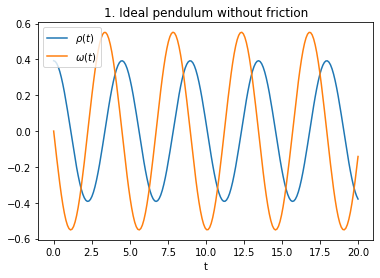

In [5]:
plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("1. Ideal pendulum without friction")
plt.xlabel("t")
plt.legend(loc='best')

### 2. Velocity dependent component, air resistance 

$F_{tan} = -mg \cdot \sin(\rho)$

One can introduca a velocity dependent component which can dampen ($b<0$) or accalerate ($b>0$) the system.

$F_{tan} = ml \cdot \ddot{\rho}(t) + b \cdot \dot{\rho}(t)$

$\begin{pmatrix}
    \dot{\rho} \\
    \dot{\omega}
\end{pmatrix}
=
\begin{pmatrix}
    \omega \\
    a \cdot \sin(\rho) + b \cdot \omega
\end{pmatrix}
$

In [6]:
t = np.linspace(0,20,200)

# initial conditions
# 22.5 deg deflection, 0 velocity

v0 = [np.pi/8,0]

solution = odeint(system, v0, t, args=(-2,-0.3))

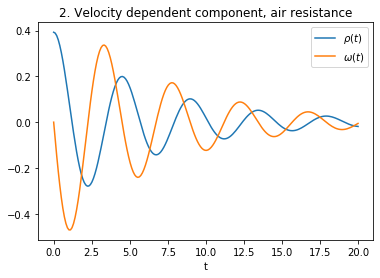

In [7]:
plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("2. Velocity dependent component, air resistance")
plt.xlabel("t")
plt.legend(loc='best')

### 3. Different initial conditions and parameters
#### 3.1 High initial velocity and air resistance
When an initial velocity is set, which will indrduce enough speed to overcome the resetting force,<br>
the pendulum will spin and do a full turn. In case of dampening by air friction, the system can become harmonic again afterwards.

#### 3.2 Positive velocity dependent component
Thinking about a universe with different physics, one could introduce a positive velocity dependent component $ b > 0$ .<br>
At some point, the velocity will be high enough to overcome the resetting force and from there on the pendulum wil spin arround the origin and accerlerate.

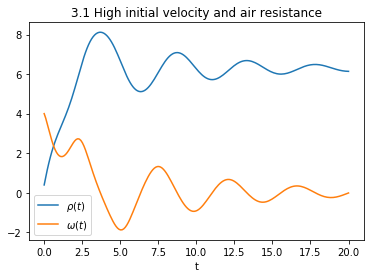

In [8]:
t = np.linspace(0,20,200)

# initial conditions
# 22.5 deg deflection, 4 velocity

v0 = [np.pi/8,4]

solution = odeint(system, v0, t, args=(-2,-0.3))

plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("3.1 High initial velocity and air resistance")
plt.xlabel("t")
plt.legend(loc='best')

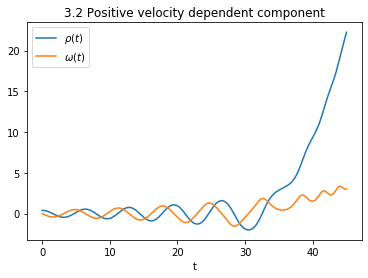

In [9]:
t = np.linspace(0,45,1000)

# initial conditions
# 22.5 deg deflection, 0 velocity

v0 = [np.pi/8,0]

solution = odeint(system, v0, t, args=(-1,0.1))

plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("3.2 Positive velocity dependent component")
plt.xlabel("t")
plt.legend(loc='best')